<br /><h1 style="font-family:Impact,Arial;font-size:70px;">Wildfires in Oregon</h1>
<h2 style="font-family:Arial;">Kimberly N. Le</h2>
<h2 style="font-family:Arial;">13109463</h2>
<p><small> Univeristy of Technology Sydney</small></p>
<p><small> 37373 Programming for Data Analysis</small></p>
<p><small><font color=MediumVioletRed>Autumn 2018</font></small>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# Abstract



<div>
<div style="background-color:#FDEDEC;">
The primary focus of this project is wildfires in Oregon, USA which is where I call home. This project is aimed to educate the audience on wildfires by expressing the correlation between wildfires and its causes. 

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 1. Motivation



<div>
<div style="background-color:#FDEDEC;">

Motivation: Last year, I experienced one of the largest wildfires of my lifetime. The fire covered over 49,000 acres of land and did 46.6 million USD in damages. That's nearly 70 million AUD! Many people had to evacuate their homes and some even lost their homes due to the fire. Unfortunately, the fire was caused by a teenage boy who thought it would be fun to throw fireworks off of a cliff. 
<br>
<br>
Clearly, this isn't the first time that this has happened but because it had such a direct impact on me I wanted to dedicate my research to finding out more about wildfires. 
<br>
<br>
Problem: Wildfires cause a lot of damage, financial deficits, and time loss. What are the cause and effects of wildfire?
<br>
<br>
New insights: Hopefully, my research and analysis will lead to answers about the cause and effects of wildfires. I will be addressing who/what was the cause, how it was created, how many days it took to put the fire out, how many acres of damage did it cover, which county had the most fires, what year and what county did it take place in, and much more.


The Gorge: Before and After<img src="http://s16750.pcdn.co/wp-content/uploads/2017/09/0907_loc_EagleCreekFire_BeforeAfter_JamesCKing-750x0-c-default.jpg" width="400" height="500" align="center"/>


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 2. The data



<div>
<div style="background-color:#FDEDEC;">
The data is provided by the <a href="https://data.oregon.gov/Natural-Resources/2005-2014-Fire-Data/9nkj-mp3y">Oregon Department of Forestry Services</a>. The data spans from 2005-2015. There were not that many big modifications to the data itself. A lot of the original columns deemed unnecesary because they were either inconsistent in data entries or did not include a key to decipher the information. 

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 3. Data preparation


In [1]:
from pathlib import Path
from math import *
import numpy as np
import pandas as pd
from pandas import DataFrame
from pathlib import Path
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt

# seaborn 
import seaborn as sns
sns.set()

# colormap support from matplotlib
from matplotlib import cm 

In [2]:
input_path = Path('Fire.csv')
data_download = pd.read_csv(input_path, encoding='utf-8')


# had 45000 empty cells with white spaces in it, extract them and reset index
mask = data_download.FireYear != ' ' 
data = data_download.loc[mask].reset_index()

# remove old index, so only resetted index will show 
data.drop('index', axis=1, inplace=True)

# drop all columns that deems unnecessary or entries are spordic/not 
# consistent/does not include decipher key to analyze
data.drop('FireName', axis=1, inplace=True)
data.drop('FireNumber', axis=1, inplace=True)
data.drop('Current_District', axis=1, inplace=True)
data.drop('Current_Unit', axis=1, inplace=True)
data.drop('Twn', axis=1, inplace=True)
data.drop('Rng', axis=1, inplace=True)
data.drop('Sec', axis=1, inplace=True)
data.drop('Subdiv', axis=1, inplace=True)
data.drop('Cause_Comments', axis=1, inplace=True)
data.drop('General_Restriction', axis=1, inplace=True)
data.drop('Industrial_Restriction', axis=1, inplace=True)
data.drop('RegulatedUseZone', axis=1, inplace=True)
data.drop('Ign_DateTime', axis=1, inplace=True)
data.drop('Size_prot', axis=1, inplace=True)
data.drop('FiscalYear', axis=1, inplace=True)
data.drop('Topography', axis=1, inplace=True)
data.drop('Aspect', axis=1, inplace=True)
data.drop('Slope', axis=1, inplace=True)
data.drop('Flame_length', axis=1, inplace=True)
data.drop('Burn_Index', axis=1, inplace=True)



# remove a random repetited row of labels, probably a mistake by the owner/recorder
# data.FireYear.unique()
data=data.drop(data.index[[27539]])

# took care of unique inputs to uniform the results
data['Control_DateTime'] = data['Control_DateTime'].replace(' ', np.nan)
data['Control_DateTime'] = data['Control_DateTime'].replace('nan', np.nan)
data['FireYear'] = data['FireYear'].replace('nan', np.nan).dropna()
data['Size_acres'] = data['Size_acres'].replace(' ', np.nan)
data['Behavior'] = data['Behavior'].replace(' ', np.nan)
data['Fuel'] = data['Fuel'].replace(' ', np.nan)
data['Elevation'] = data['Elevation'].replace(' ', np.nan)

# changed empty entry to 37 because that is the 'othered' category
# need to change entry so that i can change the datatype to int as well
data['County'] = data['County'].replace(' ', '37')

# drop 1900 from FireYear because they are tester entries
data['FireYear'] = data['FireYear'][data.FireYear != '1900']

# drop 2004 from FireYear because it seems like there is only one entry for that year which must have been a mistake
data['FireYear'] = data['FireYear'][data.FireYear != '2004']

# break up long and lat 
# remove the parenthesis in order to extract coordinates
data['Location']=data['Location'].astype(str).map(lambda x: x.lstrip('(').rstrip(')'))
data[['Lat', 'Long']] = data['Location'].fillna('0,0').str.split(',', expand=True).dropna().astype(float)

/Users/Kimberly/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(3)

,FireYear,County,CauseByDesc,GeneralDesc,SpecificDesc,ReportDateAndTime,Control_DateTime,Behavior,Fuel,Elevation,Size_acres,Location,Lat,Long
0,2005.0,32.0,,No Fire (NFCA),Smoke chase thought to be lightning,07/31/2005 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,"45, -117",45.0,-117.0
1,2005.0,20.0,,No Fire (NFCA),Other non-fire summaries,07/25/2005 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,"44, -123",44.0,-123.0
2,2005.0,17.0,,No Fire (NFCA),Smoke chase thought to be human-caused,07/03/2005 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,"42, -123",42.0,-123.0


In [4]:
# I had a hard time removing some of the null rows from FireYear. For some reason .dropna() did not work.
# So, I will remove the index manually.

# 5 null rows that need to be removed
print(data.FireYear.isnull().value_counts())

# finds index where null is
null_bool=data.FireYear.isnull()
index=data[null_bool].index
print(index)

# remove the indexes
data=data.drop(data.index[[index]])

# Proof that null is removed 
print(data.FireYear.isnull().value_counts())

False    28484
True         5
Name: FireYear, dtype: int64
Int64Index([26561, 26562, 26563, 26564, 26565], dtype='int64')
False    28484
Name: FireYear, dtype: int64


In [5]:
data['CauseByDesc'] = data['CauseByDesc'].replace('Non-Specified', ' ')

In [6]:
# change datatypes
data['County'] = data['County'].dropna().astype(float).astype(int).astype('category')
data['Behavior']  = data['Behavior'].dropna().astype(float).astype(int).astype('category')
data['Fuel']  = data['Fuel'].dropna().astype('category')
data['Elevation']  = data['Elevation'].dropna().astype(float).astype(int).astype('category')
data['FireYear']  = data['FireYear'].astype(float).astype(int)
data['Size_acres']=data['Size_acres'].dropna().astype(float)

data['ReportDateAndTime'] = pd.to_datetime(data.ReportDateAndTime)
data['Control_DateTime'] = pd.to_datetime(data.Control_DateTime)



In [7]:
# FireYear should be the max number as it is the only necessary/required input
# Other columns may have less data because it may not be required to fill out all cols
data.count()

FireYear             28484
County               28484
CauseByDesc          28484
GeneralDesc          28484
SpecificDesc         28484
ReportDateAndTime    28484
Control_DateTime     11057
Behavior             11049
Fuel                 11103
Elevation             3848
Size_acres           14717
Location             28484
Lat                  23940
Long                 23940
dtype: int64

In [8]:
data.sample(5)

,FireYear,County,CauseByDesc,GeneralDesc,SpecificDesc,ReportDateAndTime,Control_DateTime,Behavior,Fuel,Elevation,Size_acres,Location,Lat,Long
20199,2012,10,Motorist,Equipment Use,Burning Vehicle or Equipment,2012-09-13,2012-09-13,2.0,H,NaN,0.01,"43.22889, -123.52472",43.22889,-123.52472
7293,2007,9,Recreationist,Juveniles,Playing With Fire (Juveniles 12 years and under),2007-03-18,2007-03-18,3.0,L,4.0,0.50,"43.70361, -121.49972",43.70361,-121.49972
18545,2012,22,,No Fire (NFCA),Standby for another protection agency,2012-07-21,NaT,NaN,NaN,NaN,NaN,"44.42444, -122.75667",44.42444,-122.75667
22285,2013,20,,No Fire (NFCA),Smoke chase thought to be human-caused,2013-05-05,NaT,NaN,NaN,NaN,NaN,"44.10694, -123.355",44.10694,-123.35500
24614,2014,19,Lightning,Lightning,Lightning,2014-07-12,2014-07-12,1.0,T,NaN,0.10,"43.24306, -121.17667",43.24306,-121.17667


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 4. Exploratory data analysis



2005    2304
2006    3093
2007    2853
2008    3011
2009    2622
2010    2044
2011    2126
2012    2548
2013    3226
2014    3577
2015    1080
Name: FireYear, dtype: int64
Average wildfires per year: 2589.4545454545455


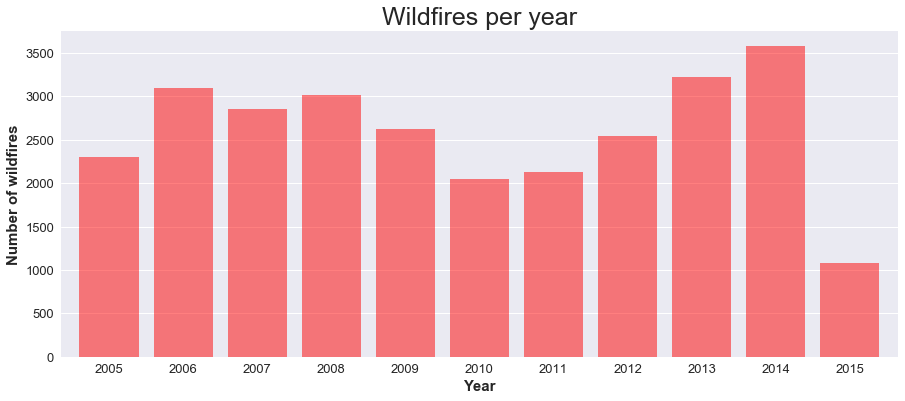

In [9]:
s = data.FireYear.value_counts(ascending=False).sort_index(ascending=True)
labels = s.index.values
ax = s.plot(kind='bar', color='r', alpha=0.5, width=0.8, figsize=(15, 6), fontsize=13)
plt.title("Wildfires per year", fontsize=25)
ax.set_ylabel('Number of wildfires', fontsize=15, weight='semibold')
ax.set_xlabel('Year', fontsize=15, weight='semibold')
ax.grid(which='major', axis='x')
ax.set_xticklabels(labels,rotation=0, ha='center' )
pass

# see exact numbers per year
print(s)
print("Average wildfires per year:", s.mean())

In [10]:
# this data is only based on what is recorded (disregarding the empty inputs)
# non-specified: 17503
data.CauseByDesc.value_counts()

                            17498
Lightning                    3235
Ruralist-Paying              1837
Recreationist                1406
Other-Public                 1152
Motorist                      861
Other-Landowner Related       620
Public Utility                547
Rancher-Farmer                386
Timber Harvest Worker         350
Ruralist-Non-Paying           190
Other Forest Mgt. Worker      177
Hunter                        170
Hiker                          38
Fisherman                      17
Name: CauseByDesc, dtype: int64

In [11]:
# graph/table does not include non-specified description which accounts for 17503 (which is a big chunk of the data)
mask = [item in item for item  in data.CauseByDesc.values ]
descbyyear=(data.loc[mask]
                 .groupby(['FireYear','CauseByDesc'])['CauseByDesc']
                 .count()
                 .unstack()
                 .fillna(0)
                .astype(int)
                ).drop([' '], axis=1)
descbyyear

CauseByDesc,Fisherman,Hiker,Hunter,Lightning,Motorist,Other Forest Mgt. Worker,Other-Landowner Related,Other-Public,Public Utility,Rancher-Farmer,Recreationist,Ruralist-Non-Paying,Ruralist-Paying,Timber Harvest Worker
FireYear,,,,,,,,,,,,,,
2005,0,7,18,130,85,32,69,104,47,24,122,22,153,34
2006,2,3,21,394,109,23,79,148,65,39,173,26,241,35
2007,3,3,18,367,102,38,70,116,53,42,146,21,233,41
2008,3,6,15,383,70,19,73,89,45,42,122,9,190,30
2009,0,1,19,295,82,11,61,95,42,34,131,14,183,22
2010,2,3,12,204,56,11,36,71,30,31,96,10,112,19
2011,2,1,16,160,47,6,37,85,38,32,119,12,117,26
2012,2,8,24,105,61,5,27,101,42,26,112,22,138,16
2013,2,3,11,514,84,14,54,118,51,31,111,10,136,40


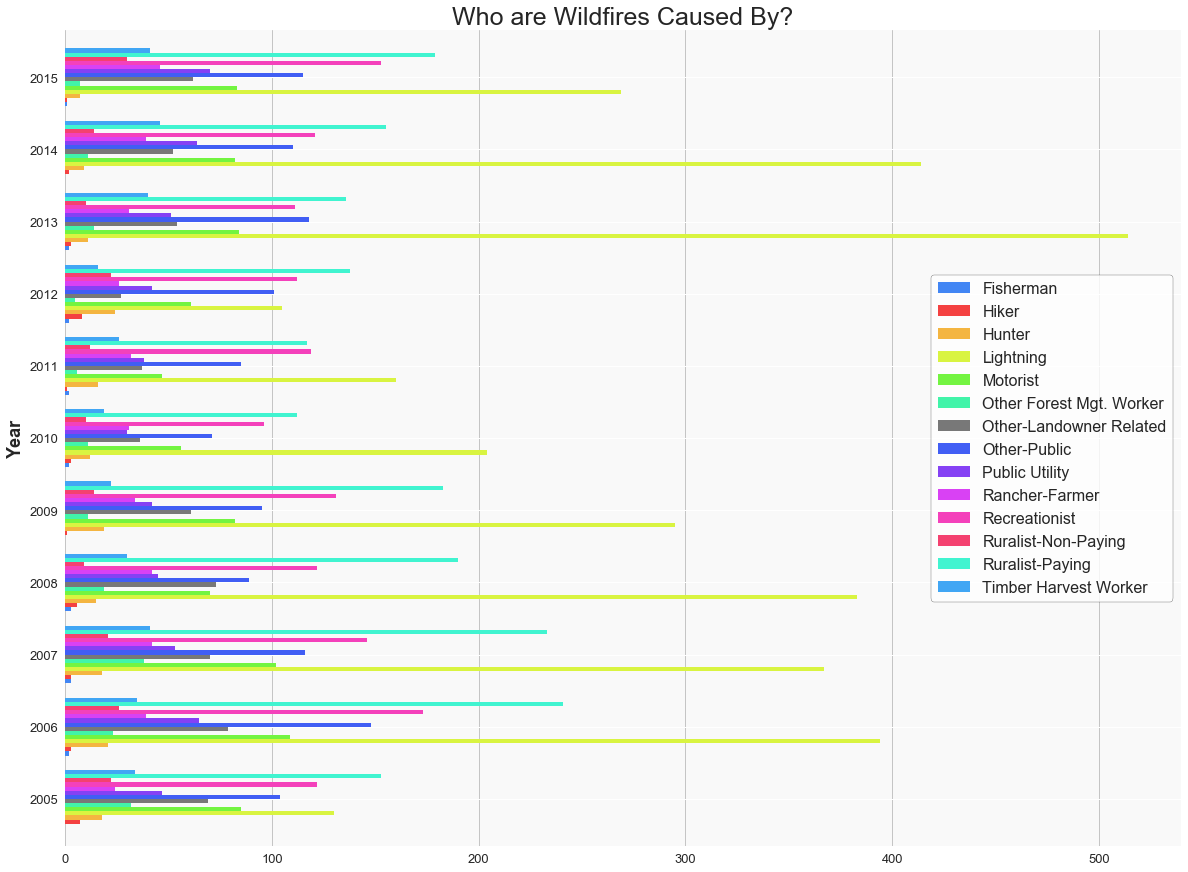

In [12]:
graph=descbyyear.plot(kind='barh', 
            color=('#4286f4', '#f44141','#f4b541','#d9f441','#73f441','#41f4a9', '#787878', '#415ef4', '#8541f4','#d941f4', '#f441bb','#f44170', '#41f4d0', '#41a6f4'),
            alpha=1, 
            width=0.8, 
            figsize=(20, 15),
            fontsize=13)

graph.set_facecolor('#F9F9F9')
graph.grid(which='major', axis='x', color='#C5C5C5')

plt.title("Who are Wildfires Caused By?", fontsize=25)
graph.set_ylabel('Year', fontsize=18, weight='semibold')
labels=descbyyear.index.values

plt.legend(loc=7, frameon=True, facecolor='w', fontsize=16).get_frame().set_edgecolor('black')



<div>
<div style="background-color:#FDEDEC;">
    
As you can see, lightning and ruralist-paying are two of the highest contributors to wildfires in Oregon. Let's take a look at how it was caused. 

No Fire   (NFCA)    13453
Lightning            4533
Equipment Use        2571
Debris Burning       2393
Miscellaneous        1746
Recreation           1663
Smoking               573
                      459
Arson                 453
Juveniles             351
Under Invest          204
Railroad               85
Name: GeneralDesc, dtype: int64


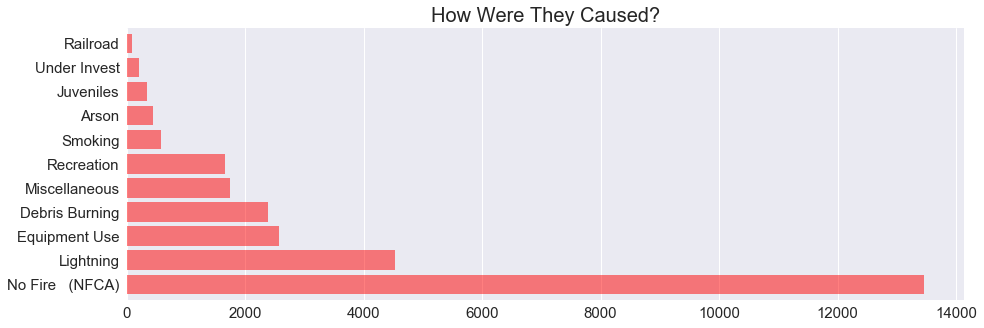

In [13]:
# NOTE: that there are 459 empty inputs 
print(data.GeneralDesc.value_counts())

# The following graph ignores the empty inputs
s = data.GeneralDesc.value_counts(ascending=False).drop([' '], axis=0)
ax = s.plot(kind='barh', 
            color='r', 
            alpha=0.5, 
            width=0.8, 
            figsize=(15, 5),
           fontsize=15)
plt.title('How Were They Caused?', fontsize=20)
ax.grid(which='major', axis='y')



<div>
<div style="background-color:#FDEDEC;">

So, I'm sure you are having the same question as me -- what does "No Fire (NFCA)" mean? NFCA stands for National Fireproofing Contractors Associates. They are contractors who install/provide fire protection for structures "as required by building codes for the preservation of the life safety". Printed below is a list of additional information taken from the "Specific Description" column that are exclusive to the "No Fire (NFCA)" data. 

</div>

In [14]:
data[data.GeneralDesc == 'No Fire   (NFCA)']['SpecificDesc'].value_counts()

Debris burning, no action taken           3234
Smoke chase thought to be human-caused    3007
Check and put out unescaped campfires     1773
Violation of ORS 477                      1467
Other non-fire summaries                  1264
Smoke chase thought to be lightning       1229
Standby for another protection agency      444
Vehicle fire, no spread to wildland        346
Smoke chase due to drift smoke             242
Structure fire, no spread to wildland      166
                                           150
Down powerline, no spread to wildland       81
Smoke chase on ocean shores                 36
Gas spill on highway                         8
Smoke chase on Oregon Parks/Rec. Dept.       5
Campfire Not Extinguished                    1
Name: SpecificDesc, dtype: int64

<div>
<div style="background-color:#FDEDEC;">
Based on who the NFCA are and the additional information from the "SpecificDesc" column, it is apparent that the data containing "No Fire (NFCA)" shows that there were either no fires, fires that were contained and limited because of the precautions taken by the NFCA, or structures that violated the ORS 477 (this does not mean that there was a fire but rather the structure(s) did not have fire preventing equipment). So, let's move forward and take a look at the second highest reason for wildfires.

<br>

Who would've thought that lightning would be a major cause of wildfires in Oregon! According to <a href="https://www.nps.gov/articles/wildfire-causes-and-evaluations.htm">National Park Services</a>, 90% of wildland fires are caused by humans. Wooh! Go Oregon residents for beating the national statistics! Below is a graph representing how many wildfires are caused by lightning per year.

</br>
</br>


In [15]:
lightning = (data[data.GeneralDesc == 'Lightning']['FireYear']
             .value_counts()
             .sort_index(ascending=True)
            )
lightning

2005    219
2006    575
2007    505
2008    539
2009    385
2010    303
2011    262
2012    169
2013    695
2014    609
2015    272
Name: FireYear, dtype: int64

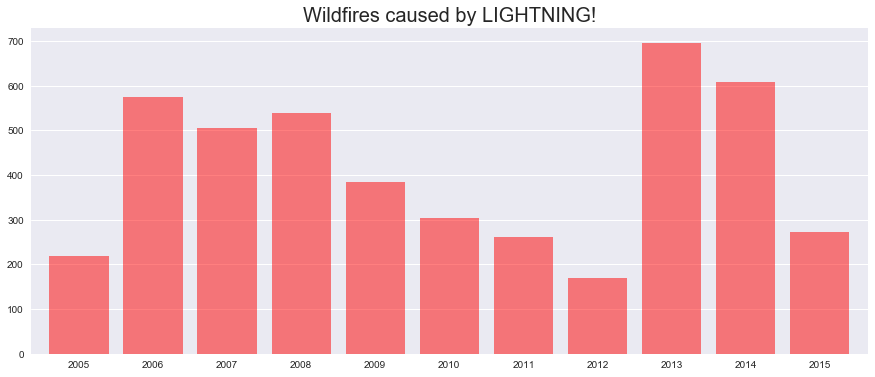

In [16]:
ax = lightning.plot(kind='bar', 
            color='r', 
            alpha=0.5, 
            width=0.8, 
            figsize=(15, 6))
labels=lightning.index.values
plt.title('Wildfires caused by LIGHTNING!', fontsize=20)
ax.set_xticklabels(labels,rotation=0, ha='center' )

ax.grid(which='major', axis='x')
pass


<div>
<div style="background-color:#FDEDEC;">
    
2013 must've been a tough year with nearly 700 wildfires caused by lightning! Let's take a look at which counties it struck in. There are a total of 36 counties in Oregon (note: in the file 37 is equivalent to n/a). The csv file that we downloaded gave us a number key that refers to specific counties. I will decode the key and make it easier for you to follow! 
</br>
</br>
</div>
</div>

In [17]:
county_names=(['Baker', 'Benton', 'Clackamas','Clatsop','Columbia','Coos','Crook','Curry','Deschutes', 
'Douglas','Gilliam','Grant','Harney','Hood River','Jackson','Jefferson','Josephine', 
'Klamath','Lake','Lane','Lincoln','Linn','Malheur','Marion','Morrow','Multnomah', 
'Polk','Sherman','Tillamook','Umatilla','Union','Wallowa','Wasco','Washington',
'Wheeler','Yamhill','Other State'])

data['County'] = data['County'].replace(np.arange(1,38,1),county_names)


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


In [18]:
mask = ["Lightning" in item for item  in data.GeneralDesc.values ]
lightning_table=(data.loc[mask]
                 .groupby(['County','FireYear'])['GeneralDesc']
                 .count()
                 .unstack()
                 .fillna(0)
                 .astype(int)
                )
# adding a column that tells you the year each county has had the maximum wildfires caused by lightning
lightning_table['MAX']=lightning_table.idxmax(axis=1)
lightning_table

FireYear,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MAX
County,,,,,,,,,,,,
Baker,20,22,18,19,6,28,5,6,35,18,13,2013
Benton,3,2,1,2,1,0,0,0,3,3,4,2015
Clackamas,1,4,0,3,0,1,1,0,1,1,0,2006
Clatsop,2,0,0,0,0,1,1,0,1,0,1,2005
Columbia,0,0,0,4,0,1,0,0,2,1,0,2008
Coos,7,2,0,5,1,1,0,3,4,0,0,2005
Crook,14,26,19,21,31,10,13,2,13,23,5,2009
Curry,5,4,1,5,0,1,0,2,6,0,4,2013
Deschutes,3,26,18,33,9,13,26,20,20,28,4,2008


In [19]:
print('Most lightning-caused wildfires per year:')
print(data.loc[mask].groupby(['County','FireYear'])['GeneralDesc']
       .count()
       .unstack()
       .max()
       .astype(int)
)

print('County with the most lightning-caused wildfires per year:')
print(data.loc[mask].groupby(['County','FireYear'])['GeneralDesc']
       .count()
       .unstack()
       .idxmax(axis=0)
)


Most lightning-caused wildfires per year:
FireYear
2005     27
2006    113
2007    110
2008    101
2009     68
2010     72
2011     46
2012     29
2013     87
2014    102
2015     45
dtype: int64
County with the most lightning-caused wildfires per year:
FireYear
2005    Klamath
2006    Klamath
2007    Klamath
2008    Klamath
2009    Klamath
2010    Klamath
2011    Klamath
2012      Grant
2013    Douglas
2014    Klamath
2015    Klamath
dtype: object


<div>
<div style="background-color:#FDEDEC;">
As you can see, nearly every year, Klamath has the most lightning-caused wildfires.
<br>
<br>
Now that we've dove into the numbers of wildfires. Let's check out the logistics. First, I am interested in how long it took to put out the fires. We will be examining the Report_DateAndTime column as well as the Control_DateTime. 
<br>
<br>
NOTE: Every entry has a ReportDateAndTime but does not always contain a Control_DateTime. There are also some negative days as a result which means that the person who input the entry may have had a rough day and did not do it correctly. It'd be silly to have a fire put out before it even started! However, data analysis must continue! So, our analysis will be based on what is given in the file, disregarding the errors.
</br>
</br>
</div>
</div>

In [20]:
# subtracting Control_Datetime (time it was put out) with ReportDateTime will give us
# the duration it took to put out the fire 
data['fire_out']=data['Control_DateTime']-data['ReportDateAndTime']

# created a boolean column to sort out the negative duration by making sure the day
# that it was put out is >= to the day it started.
data['fire_out_bool']=(data['Control_DateTime'] >= data['ReportDateAndTime'])

# edit the fire_out column so that there are no more negative days left by using the boolean
# we created above
data['fire_out']=data[data.fire_out_bool].fire_out

print(data.fire_out.dropna().value_counts().sort_index(ascending=True))
print("Average amount of days to put out fire: ", data.fire_out.mean())

0 days       8329
1 days       1098
2 days        178
3 days        569
4 days        248
5 days        120
6 days         94
7 days         61
8 days         37
9 days         30
10 days        43
11 days        22
12 days        13
13 days         7
14 days         4
15 days        10
16 days         5
17 days         2
18 days         2
19 days         6
20 days         8
21 days         2
22 days         3
23 days         1
24 days         1
25 days         4
26 days         3
27 days         3
28 days         2
29 days         2
             ... 
72 days         1
74 days         1
76 days         1
83 days         1
85 days         2
91 days         3
93 days         1
95 days         2
98 days         1
103 days        1
109 days        1
110 days        2
128 days        1
131 days        3
140 days        1
141 days        1
143 days        1
152 days        1
157 days        1
158 days       11
172 days        1
365 days        1
366 days        1
367 days        1
731 days  

<div>
<div style="background-color:#FDEDEC;">

Wow! There were two fires that lasted for more than 9 years! If a wildfire is able to last that long, I wonder how many acres it spread. Below, I created a table that shows how many wildfires occured each year based on the range of acres it affected.

</div>
</div>

In [21]:
data['acres_range'] = pd.cut(data['Size_acres'], [0,0.5,1,2,5,7,10,50,100,500,1000,5000,10000, 50000,100000,200000], 'right')
s=data.groupby(['acres_range','FireYear'])['acres_range'].count().unstack().fillna('0').astype(int)
s

FireYear,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
acres_range,,,,,,,,,,,
"(0.0, 0.5]",867,1418,1190,1074,992,744,728,688,1135,1117,823
"(0.5, 1.0]",77,96,73,73,85,42,45,45,98,81,55
"(1.0, 2.0]",58,65,81,69,49,34,35,59,52,69,53
"(2.0, 5.0]",57,71,70,72,42,35,37,47,77,69,38
"(5.0, 7.0]",11,24,18,16,16,11,9,10,18,13,11
"(7.0, 10.0]",24,29,12,14,10,8,8,12,22,11,11
"(10.0, 50.0]",37,49,70,43,40,29,36,38,50,61,28
"(50.0, 100.0]",13,13,16,14,6,6,11,13,14,13,9
"(100.0, 500.0]",12,20,33,18,17,6,15,4,29,22,11


<div>
<div style="background-color:#FDEDEC;">
As you can see, there is a significant amount of wildfires that spread from 0-0.5 acres. The heatmap below shows the same table; however, I removed the first row of acres, ranging from 0-1, because the color scale was extremely off and you would not be able to see any progression.

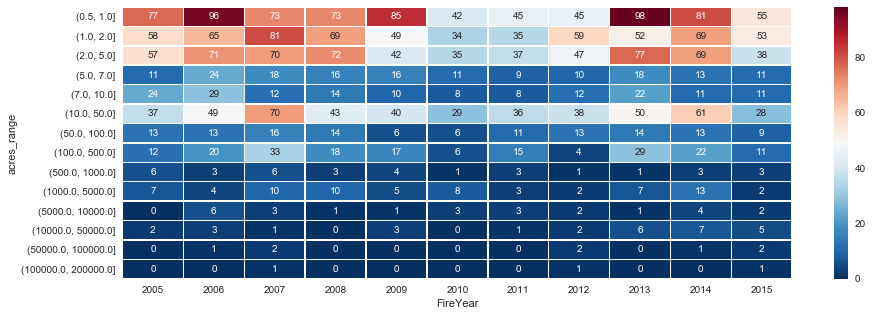

In [22]:
data['acres_range'] = pd.cut(data['Size_acres'], [0.5,1,2,5,7,10,50,100,500,1000,5000,10000, 50000,100000,200000], 'right')
s=data.groupby(['acres_range','FireYear'])['acres_range'].count().unstack().fillna('0').astype(int)
s

f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(s, annot=True, fmt="d", linewidths=.5, ax=ax,cmap='RdBu_r')


<div>
<div style="background-color:#FDEDEC;">
Let's recap. We have now explored the amount of wildfires, who/how it was caused by, which counties was most affected, how many days it took to put out the fires, and the amount of acres that was affected. Now, let's investigate the performance of the wildfires. We have three different columns (Behavior, Fuel, Elevation) of data that will give us a better understanding of the fire itself. Similar to the coded counties, we need to decipher the entries for these columns. 

In [23]:
# Behavior entries were numbers ranging from 1-9 of which I replaced with its actual meaning
behavior_k=(['Smoldering','Creeping/spreading','Running','Running/spotting', 
             'Crowning','Crowning and spotting','Erratic behavior','Non-forest fuel'])
data['Behavior'] = data['Behavior'].replace([1,2,3,4,5,6,7,9],behavior_k)

# Fuel entries were given key letters of which I replaced wiht its actual meaning
fuel_k=(['Annual grass (cheat)', 'Perennial grass','Open pine grass under', 
         'Dense chaparral', 'Dense brush-lighter than B' ,'Sagebrush (med-dense)', 
         'Conifer, old growth', 'Conifer, second growth','Closed canopy pine', 
         'Hardwoods, summer', 'Slash, heavy','Slash, medium',
        'Slash, thinning, P.C. or scattered','Non wildland fuel'])
fuel_letter=(['A','L','C',
             'B','F', 'T',
             'G','H', 'U',
             'R','I','J',
              'K','X'])
data['Fuel']=data['Fuel'].replace(fuel_letter,fuel_k)

# Elevation entries were numbers ranging from 0-9 of which I replaced with its actual meaning
elevation_k=(['Below sea level - 500 feet','501 - 1500 feet','1501 - 2500 feet', 
              '2501 - 3500 feet','3501 - 4500 feet','4501 - 5500 feet','5501 - 6500 feet', 
              '6501 - 7500 feet','7501 - 8500 feet','Over 8500 feet'])
data['Elevation']=data['Elevation'].replace(np.arange(0,10,1),elevation_k)

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


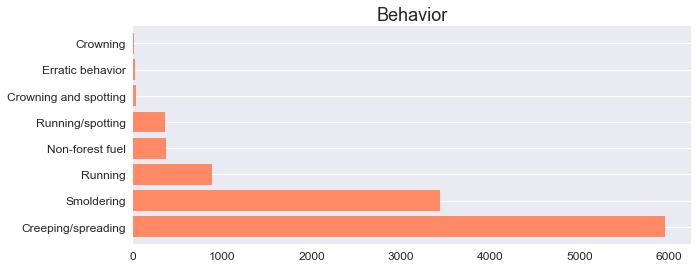

In [27]:
b = data.Behavior.value_counts(ascending=False)
ax = b.plot(kind='barh', 
            color='#FF8A65', 
            alpha=1, 
            width=0.8, 
            figsize=(10, 4),
           fontsize=12)
plt.title('Behavior', fontsize=18)
ax.grid(which='major', axis='x')


<div>
<div style="background-color:#FDEDEC;">
The behavior graph tells us the performance of the live wildfires. It seems like most of the wildfires creep and spread. In comparison to the other behaviors, creeping/spreading is quite minimal. This is not surprising. If you can recall, there were over 8,000 wildfires that was put out the day it occured AND there was over 13,000 that was labeled "No Fire (NFCA)". 

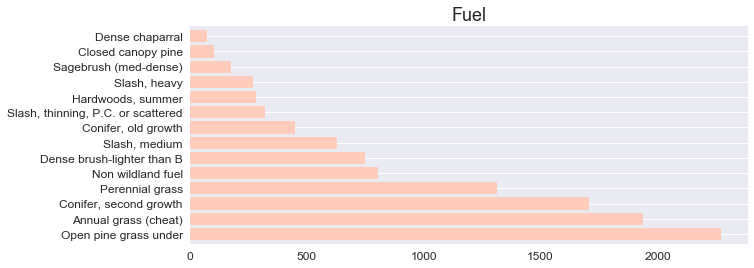

In [25]:
f = data.Fuel.value_counts(ascending=False)
ax = f.plot(kind='barh', 
            color='#FFCCBC', 
            alpha=1, 
            width=0.8, 
            figsize=(10, 4),
           fontsize=12)
plt.title('Fuel', fontsize=18)
ax.grid(which='major', axis='x')

<div>
<div style="background-color:#FDEDEC;">
The graph above shows that most wildfires are fueled by open pine grass, followed by different plants. This makes sense because Oregon is home to many different pine trees. According to the <a href="http://www.oregon.gov/ODF/Documents/AboutODF/ForestryFactsFigures.pdf">Oregon Department of Forestry</a>, "30 million of the state's 63 million acre land base" is covered in forestry. That's about 48%! No wonder, the largest fuels of the wildfires are plants.

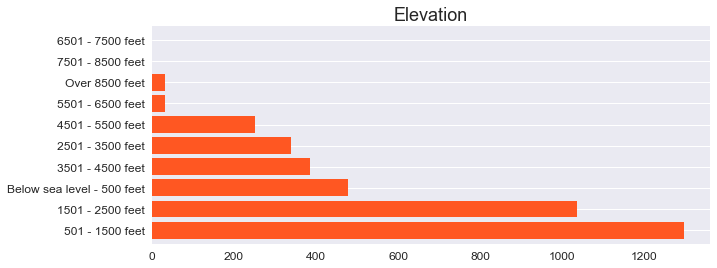

In [26]:
e = data.Elevation.value_counts()
ax = e.plot(kind='barh', 
            color='#FF5722', 
            alpha=1, 
            width=0.8, 
            figsize=(10, 4),
           fontsize=12)
plt.title('Elevation', fontsize=18)
ax.grid(which='major', axis='x')

<div>
<div style="background-color:#FDEDEC;">
I thought it'd be interesting to include the elevation that the wildfires occur on. I apologize for not being able to sort the index but I will do my best to describe the data! I live Portland, Oregon which is the largest city in the state. The average elevation of the city is alittle above sea level at 50 feet. However, the average elevation of the entire state is about 3,300 feet above sea level. I actually had a look at a <a href="http://www.netstate.com/states/geography/mapcom/or_mapscom.htm">map</a> and noticed that the city/populated areas of Oregon is near sea level which means that most of the wildfires occur in rural areas of Oregon. 

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 5. Results/Insights

Discuss any non-trivial result or insight into the problem stemming from your analysis.

__Create as many code, markdown and raw cells as needed__

<div>
<div style="background-color:#FDEDEC;">
<b>Cause of wildfires:</b>
- Who: Lightning is the top contributor to Oregon's wildfires every year. Recreationalists and motorists follow.
- How: The top three ways wildfires are started are by lightning, equipment-use, and debris burning. 
- Looked at the behavior, fuel and elevations of the wildfires. Most fires occur in higher elevations which happens to be the rural areas of Oregon. Most fires' behavior is a minimal/limited fire. Last but not least, most fires are fueled by debris and plants. These three factors are important to note because it plays a key factor in supporting the who and the how the wildfires are caused from. 

<b>Effects of wildfires:</b>
- To measure the effects of wildfires, I calculated the the amount of time it took to put out the fire. I found that  wildfires lasts for as long as a couple hours to nine years. Imagine how much money and resources was used to put these fires out. 
- Looked at the amount of acres the wildfires spread across. There were 3 wildfires that reached 160,000 acres. That's about the size of half of Cairns! 

On average, there are 2589 wildfires each year in Oregon. It seems like a lot to me because the only wildfire I have ever witnessed was The Gorge in fall of 2017. 


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 6. In hindsight...

In this section you should reflect on your work and what you've learned. In particular you should include:

<ul>
    <li> a discussion of the most challenging aspect of the data analysis and if/how you overcame the challenge.</li>
    <li> a discussion of any programming technique and/or reference you found particularly useful or helpful for your project.</li>
    <li> an assessment of the outcome of the study in relation to the original goals (i.e., have the goals been reached, or did you have to reassess the goals during the project, and if so why?).</li>
    <li> a discussion of what new, or surprising knowledge or insight into the problem you've gained by conducting the study.</li>
    <li> a discussion of whether you would approach the problem differently if given an opportunity to redo the work, and any advice they would give to someone who would want to work on a similar problem.</li>
    <li> a discussion of how your analysis could be improved or extended in future work.</li>

</ul>

<div>
<div style="background-color:#FDEDEC;">
    <b>Challenges:</b>
- I didn't realize that it would take a lot of time to go through the data and clean up. 
- I wanted to do a lot more with the graphs but found myself limited a lot of the times. 
- I also didn't think I'd face a lot of trivial problems that we had already learned in class but it took up a lot of time. However, once I had the ball rolling it was extremely fun to explore different things I could use in this project.

<b>Technique/reference:</b>
- Stackoverflow
- Pandas documentation (https://pandas.pydata.org/pandas-docs/stable/index.html)
- Previous projects: it helped me brainstorm what kind of tables and graphs i wanted to include
- Previous notebooks
- seaborn

<b>Assess original goals:</b>
- I think I did a pretty good job answering my question and provided and selected the best data to do so. 
- One goal that I was not able to reach was to include a map using either cartopy, bokeh, or geopandas. Though, I still plan on working on the notebook after it is due. The maps were really tricky because most of them required connecting through an API and it was really time consuming to learn how each one worked. I ended up spending more time on researching the maps than I anticipated.

<b>Surprising knowledge/insight:</b>
- I didn't think lightning was that big of a deal. I live in the city which doesn't get many wildfires or dangerous weather but it was still really shocking to learn that that many wildfires are started by lightning!
- I also did not think it was possible to have a wildfire last 9 years before it is put it! I was so shocked that I had to fact check online just in case it wasn't an accident entry. Wildfires can last for a long time especially if it burns the roots underground or strikes hazardous fuels.

<b>Approach/advice:</b>
- I don't think I would have approached the problem any different; however, i would definitely continue to work on the project because I think there is more to be show. 
- The only advice I would give to someone working on similar problems is to upload/cleanup the data, and then brainstorm and sketch out graphs/tables on a piece of paper. Then, create a storyline and proceed to the visuals.

<b>How work can be improved/extended:</b>
- Add a map! Visually, it would be so helpful to see where the wildfires are located and see the concentration of each area. 
- My graphs can definitely use some improvement. I've been playing around with seaborn and some other graphs that we hadn't uet learned in class and I think it would definitely my narrative.

